In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/Users/Bakso/Documents/git/604Final/data/daily_data.csv')

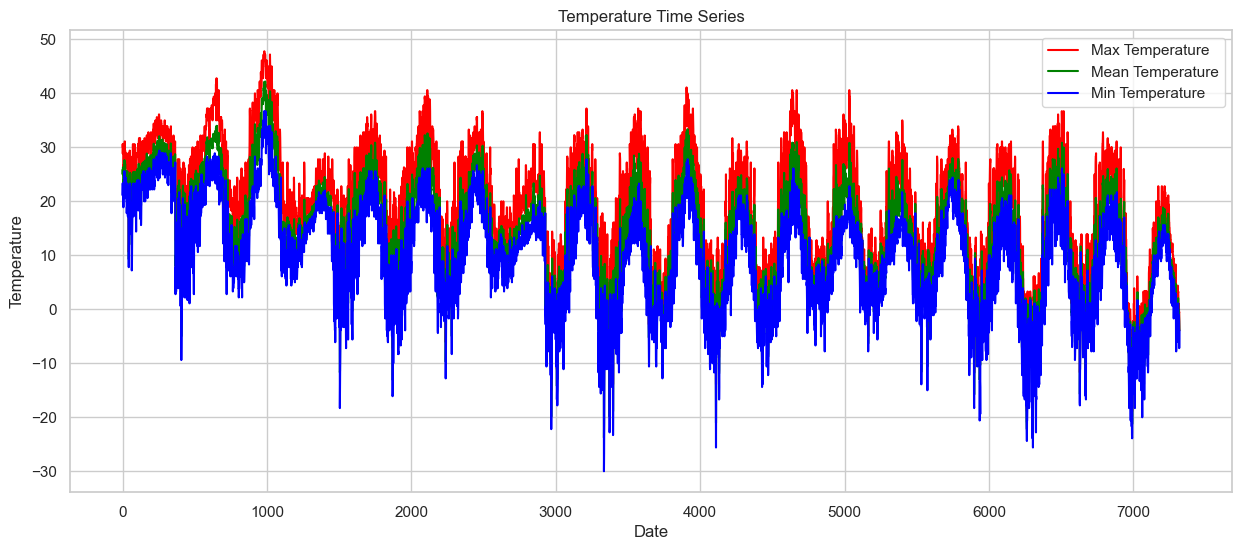

In [4]:
sns.set(style="whitegrid")

# Temperature time series plot
plt.figure(figsize=(15, 6))
plt.plot(data['temp_max'], label='Max Temperature', color='red')
plt.plot(data['temp_mean'], label='Mean Temperature', color='green')
plt.plot(data['temp_min'], label='Min Temperature', color='blue')
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

## Implementing SARIMA Model 

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q = 1, 1, 1  # Non-seasonal params
P, D, Q, s = 1, 1, 1, 360  # Seasonal params


sarima_model_temp_mean = SARIMAX(data['temp_mean'],
                                 order=(p, d, q))
                                


# sarima_model_temp_mean = SARIMAX(data['temp_mean'],
#                                  order=(p, d, q),
#                                  seasonal_order=(P, D, Q, s),
#                                  enforce_stationarity=False,
#                                  enforce_invertibility=False)

sarima_fit_temp_mean = sarima_model_temp_mean.fit()

predictions_temp_mean = sarima_fit_temp_mean.get_forecast(steps=4)
predicted_means = predictions_temp_mean.predicted_mean
predicted_means


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.45493D+00    |proj g|=  5.94314D-02

At iterate    5    f=  2.42114D+00    |proj g|=  1.97515D-02

At iterate   10    f=  2.41907D+00    |proj g|=  1.08475D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     17      1     0     0   7.828D-06   2.419D+00
  F =   2.4190649012194338     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


7320   -3.238706
7321   -2.759349
7322   -2.411874
7323   -2.159998
Name: predicted_mean, dtype: float64

In [6]:
def optimize_ARIMA(order_list, exog):

    results = []
    
    for order in tqdm_notebook(order_list):
        model = SARIMAX(exog, order=order).fit(disp=-1)
        aic = model.aic
        results.append([order, model.aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [7]:
from itertools import product
from tqdm import tqdm_notebook

ps = range(0, 10, 1)
d = 0
qs = range(0, 10, 1)

parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_0 = optimize_ARIMA(order_list, exog = data['temp_mean'])

/var/folders/83/l90nsr955zzdy6yv_p2ch0680000gr/T/ipykernel_35870/3394143862.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/100 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.9/s

In [8]:
result_d_0.head()

,"(p, d, q)",AIC
0,"(4, 0, 3)",35019.036866
1,"(8, 0, 9)",35079.104249
2,"(9, 0, 9)",35080.529616
3,"(8, 0, 8)",35083.913301
4,"(8, 0, 7)",35084.887579


In [9]:
best_model_0 = SARIMAX(data['temp_mean'], order= (4, 0, 3)).fit()
print(best_model_0.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.39873D+00    |proj g|=  2.25988D-02


 This problem is unconstrained.



At iterate    5    f=  2.39767D+00    |proj g|=  3.35222D-03

At iterate   10    f=  2.39763D+00    |proj g|=  2.29168D-03

At iterate   15    f=  2.39761D+00    |proj g|=  5.61440D-05

At iterate   20    f=  2.39761D+00    |proj g|=  1.36199D-03

At iterate   25    f=  2.39757D+00    |proj g|=  2.39771D-03

At iterate   30    f=  2.39750D+00    |proj g|=  2.94157D-03

At iterate   35    f=  2.39739D+00    |proj g|=  9.45918D-03

At iterate   40    f=  2.39649D+00    |proj g|=  1.23980D-02

At iterate   45    f=  2.39292D+00    |proj g|=  5.37571D-03


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.39092D+00    |proj g|=  2.47709D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61      1     0     0   2.477D-03   2.391D+00
  F =   2.3909178187296742     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                               SARIMAX Results                                
Dep. Variable:              temp_mean   No. Observations:                 7320
Model:               SARIMAX(4, 0, 3)   Log Likelihood              -17501.518
Date:                Tue, 21 Nov 2023   AIC                          35019.037
Time:                        14:11:18   BIC  